<a href="https://colab.research.google.com/github/shreshthajit/Alghorithm_Design_and_Analysis/blob/master/Digit%20Classification/Neural_Network_For_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(X_train,y_train) , (X_test,y_test)=keras.datasets.mnist.load_data()
len(X_train)

len(X_test)


10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

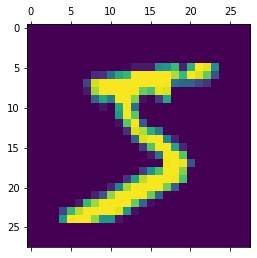

In [13]:
plt.matshow(X_train[0])

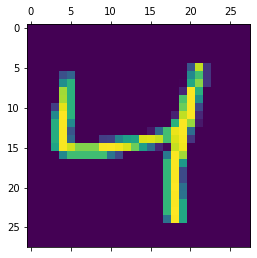

In [14]:
plt.matshow(X_train[2])

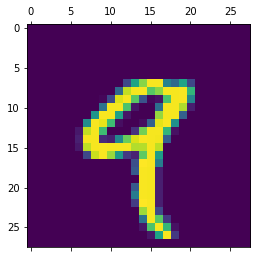

In [15]:
plt.matshow(X_train[4])

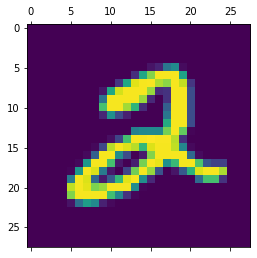

In [16]:
plt.matshow(X_train[5])

In [17]:
y_train[2]

4

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
X_train.shape

(60000, 28, 28)

In [34]:
X_train=X_train/255
X_test=X_test/255

In [37]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
X_train_flattened.shape

(60000, 784)

In [29]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
X_test_flattened.shape

(10000, 784)

In [36]:
X_test_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

`keras.sequential means I am having a stack of layers in neural network.So we have 10 output layers and 784 input layers and we will use sigmoid function.
we will use an optimizer called 'adam'
we will use a loss function called 'sparse_categorical_crossesntropy'
we will use matrices as accurace
epochs=5 means we will use 5 interaions`

In [35]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 9.6907 - accuracy: 0.8399
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1044 - accuracy: 0.8765
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6103 - accuracy: 0.8846
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3892 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4265 - accuracy: 0.8866


`Now we will evaluate it in a test dataset.Before we have used trained dataset`

In [38]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 898us/step - loss: 5.9630 - accuracy: 0.8809


[5.963001251220703, 0.8809000253677368]

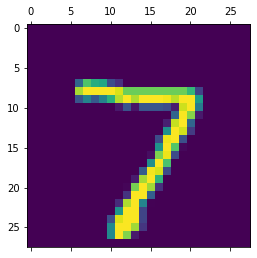

In [40]:
plt.matshow(X_test[0])

In [39]:
model.predict(X_test_flattened)

array([[0.0000000e+00, 0.0000000e+00, 2.8856371e-15, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9430412e-01, 1.0000000e+00, ..., 0.0000000e+00,
        9.8808169e-01, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 9.3604097e-21,
        9.8761189e-01, 5.0350390e-14],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.7882292e-31, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.6402833e-30,
        1.0000000e+00, 7.7453580e-20],
       [9.9999517e-01, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.2593851e-33, 0.0000000e+00]], dtype=float32)

In [55]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([0.0000000e+00, 0.0000000e+00, 2.8856371e-15, 1.0000000e+00,
       7.6569618e-35, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

Now we need to take the maximum of all the output layers

In [56]:
np.argmax(y_predicted[0])

3

In [57]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [61]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    1,    1,    0,    0,    0,    0,    1,    0],
       [   5, 1128,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 144,  245,  636,    1,    6,    0,    0,    0,    0,    0],
       [ 169,  136,  477,  224,    1,    3,    0,    0,    0,    0],
       [  98,   51,  231,  128,  471,    0,    0,    2,    1,    0],
       [ 215,   34,  164,  238,   41,  197,    2,    0,    1,    0],
       [ 316,   50,  563,    3,   13,    3,    9,    0,    1,    0],
       [  49,   63,  278,  543,   38,   23,    0,   34,    0,    0],
       [  79,  128,  583,   73,   16,   71,    1,    5,   18,    0],
       [  36,   52,  220,  461,  209,    2,    0,   27,    1,    1]],
      dtype=int32)>

let's use some fancy color vision of that matrix

Text(69.0, 0.5, 'Truth')

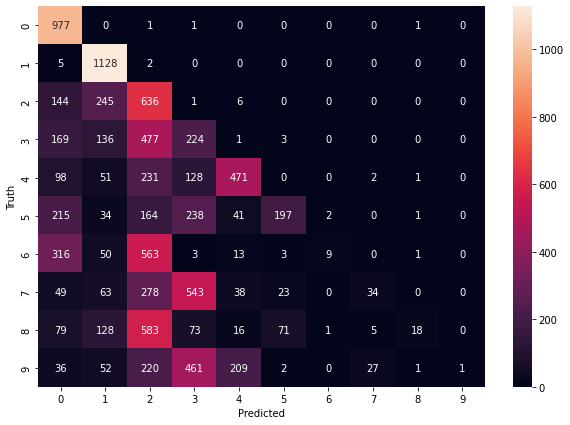

In [62]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.5059 - accuracy: 0.8483
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3933 - accuracy: 0.9047
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2883 - accuracy: 0.9253
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2640 - accuracy: 0.9342
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2412 - accuracy: 0.9384


In [66]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.9377


[0.2939680814743042, 0.9376999735832214]

Text(69.0, 0.5, 'Truth')

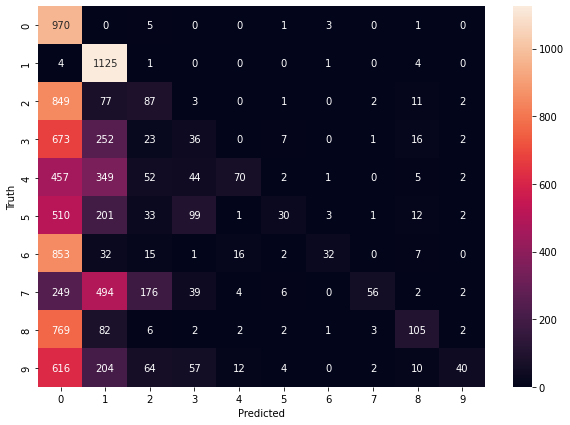

In [67]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
                              